# CNN 특강

Fully Connected Layer만 사용시 1차원 형태로 펴지기 때문에 위치정보를 잃어버리게 된다. 

채널 : R,G,B 채널을 다 더해서 color로 출력가능하다. 

Feature Map : input data에 filter 합성곱을 통해 feature map을 채운다. 

Padding : 출력 데이터의 사이즈가 줄어드는 것을 방지하기 위한 것이다.  사이드의 내용이 중요하면 padding을 넣지 않고 그대로 진행한다. 

Pooling : 원하는 size만큼의 특징을 뽑을 수 있다. 보통 2x2

Keras를 이용해서 MNIST data를 분류해보겠다. 

# MNIST with Only Fully-Connected Layer

In [120]:
import keras
print(keras.__version__)

from keras.datasets import mnist

2.2.4


In [121]:
(train_images, train_labels), (test_images,test_labels)  = mnist.load_data()

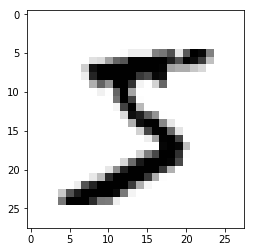

In [10]:
import matplotlib.pyplot as plt
image = train_images[0].reshape(28,28)
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

In [20]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [21]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [123]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [28]:
network.fit(train_images,train_labels,epochs=10,batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 1.4902 - acc: 0.6611
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.5934 - acc: 0.8515
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.4151 - acc: 0.8868
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3554 - acc: 0.8998
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3260 - acc: 0.9063
Epoch 6/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.3059 - acc: 0.9117
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2912 - acc: 0.9160
Epoch 8/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2783 - acc: 0.9194
Epoch 9/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2672 - acc: 0.9230
Epoch 10/10
60000/60000 [===========================

In [29]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 39us/step


In [33]:
print("Test Loss : {0} / Test Acc : {1}".format(test_loss,test_acc))

Test Loss : 1.7081839944860593 / Test Acc : 0.8915


# MNIST with CNN

In [124]:
networkCNN = models.Sequential()

# 필터도 학습하면서 최적의 값을 찾아간다. 필터를 weight라고 보면 됨.
# strides default 값이 (1,1)이다. 

networkCNN.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1)))  # (28,28,1)에서 1은 흑백 채널을 말함 / 필터가 32개 있는 것 
networkCNN.add(layers.MaxPool2D((2,2)))
networkCNN.add(layers.Conv2D(64,(3,3),activation='relu')) 
networkCNN.add(layers.MaxPool2D((2,2)))
networkCNN.add(layers.Conv2D(64,(3,3),activation='relu'))                

In [125]:
# 지금까지 Conv net의 구조 출력 
# Conv layer를 거치면 (input_size - Filter_size) / stride) + 1로 사이즈가 줄어듬 
# 여기서는 (2,2)로 설정했기에 MaxPooling을 거치면 size가 반으로 줄어든다.  / 소수점은 버림 
networkCNN.summary()

# param = 3x3x28 = 288 + 32 (필터의 갯수)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [126]:
# 평평하게 한 줄짜리로 만듬 
networkCNN.add(layers.Flatten())
networkCNN.add(layers.Dense(64, activation='relu'))
networkCNN.add(layers.Dense(10, activation='softmax'))

In [127]:
networkCNN.summary()
# 마지막 softmax를 통해 나온 확률을 통해 레이블을 예측한다.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                36928     
__________

In [128]:
networkCNN.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [129]:
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [130]:
networkCNN.fit(train_images,train_labels,epochs=5,batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 31s 515us/step - loss: 1.4089 - acc: 0.5150
Epoch 2/5
60000/60000 [==============================] - 29s 485us/step - loss: 0.3425 - acc: 0.8947
Epoch 3/5
60000/60000 [==============================] - 29s 489us/step - loss: 0.1825 - acc: 0.9435
Epoch 4/5
60000/60000 [==============================] - 29s 490us/step - loss: 0.1213 - acc: 0.9624
Epoch 5/5
60000/60000 [==============================] - 30s 505us/step - loss: 0.0921 - acc: 0.9717


In [131]:
test_loss, test_acc = networkCNN.evaluate(test_images,test_labels)

10000/10000 [==============================] - 2s 172us/step


In [132]:
print("Test Loss : {0} / Test Acc : {1}".format(test_loss,test_acc))

Test Loss : 0.07805479819169268 / Test Acc : 0.9762


CNN을 이용하니 더 좋은 성능을 내는 것을 확인해 볼 수 있다. 

89% -> 97%